# Time series analysis

###- [https://www.kaggle.com/code/prashant111/complete-guide-on-time-series-analysis-in-python]
- decomposition
- detrend
- cross correlation
- Granger causality test - if one is sequence of another 


In [ ]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import functools
import operator
import os
import os.path as op
import numpy as np
import pytrends
from pytrends.request import TrendReq #as UTrendReq
from datetime import date
import datetime as d
from collections import Counter


In [ ]:
# # Opening JSON file
# f = open('../data/raw/CMS_2010_to_June_2022_ENGLISH.json')
# # returns JSON object as a dictionary
# data = json.load(f)
# df = pd.DataFrame.from_dict(data)
# df = df.sort_values(by= 'lastModifiedDate')
# df = df.reset_index()

In [ ]:
# datetimes = pd.to_datetime(df['lastModifiedDate'])
# df['ts_lastModifiedDate']=datetimes
# #df.iloc[ts_start]['ts_lastModifiedDate']


# #find start index for subset 2019-2022
# ts_start=datetimes[(datetimes > pd.Timestamp(year=2019, month=1, day=1).tz_localize('utc')) 
#           & (datetimes < pd.Timestamp(year=2019, month=1, day=2).tz_localize('utc'))].min()
# print(ts_start)
# #find end date for subset 2019-2022
# ts_end=datetimes[(datetimes > pd.Timestamp(year=2022, month=1, day=1).tz_localize('utc')) 
#           & (datetimes < pd.Timestamp(year=2022, month=1, day=2).tz_localize('utc'))].min()
# print(ts_end)

# start_date=datetimes[datetimes == ts_start]
# end_date=datetimes[datetimes == ts_end]

# #find index for the chosen start and end dates
# start_index=start_date.index[0]
# print(start_index)
# df[df.index == start_date.index[0]]

# end_index=end_date.index[0]
# print(end_index)
# df[df.index == end_date.index[0]]

# df_subset=df[start_index:end_index]


In [ ]:
# GET_METHOD='get'


# headers = {
#     'authority': 'trends.google.com',
#     'accept': 'application/json, text/plain, */*',
#     'accept-language': 'el-GR,el;q=0.9,en;q=0.8,es;q=0.7',
#     'content-type': 'application/json;charset=UTF-8',
#     'cookie': '__utma=10102256.1937595387.1677588086.1677588086.1678441622.2; __utmc=10102256; __utmz=10102256.1678441622.2.2.utmcsr=trends.google.com|utmccn=(referral)|utmcmd=referral|utmcct=/; __utmt=1; __utmb=10102256.13.9.1678442016068; CONSENT=YES+GB.en-GB+; HSID=AwrWd8APwv-yBWgzh; SSID=AeXCoum7ArBP5_-aa; APISID=CH4IjtEJhVzXdXGB/AFPE6uuFtOUDiSjnb; SAPISID=FcPgZF83fs0zxFml/Ad59_bwdrgg_kZ4q4; __Secure-1PAPISID=FcPgZF83fs0zxFml/Ad59_bwdrgg_kZ4q4; __Secure-3PAPISID=FcPgZF83fs0zxFml/Ad59_bwdrgg_kZ4q4; SID=TwhPHvTugfJu62Xh-HCJkOIPdoEDrL6q-6Eu9itbEI8mmKw9wzJdgT6c48lYdsNyN4E5xA.; __Secure-1PSID=TwhPHvTugfJu62Xh-HCJkOIPdoEDrL6q-6Eu9itbEI8mmKw9mFTrJ0j2r8zMRcq3v-A7Dg.; __Secure-3PSID=TwhPHvTugfJu62Xh-HCJkOIPdoEDrL6q-6Eu9itbEI8mmKw9xQIlYIR6TyZD2qXkeuopSA.; OGPC=19031986-1:; AEC=ARSKqsLpZW_sbZN2NdijlA8HPzuRHa1TPtYLHLGgaOIZpt8oJZL9PYZZYQ; SEARCH_SAMESITE=CgQI4ZcB; 1P_JAR=2023-03-10-09; NID=511=bYRTpZST7bJyL0z371h4Y79EMA1j9QqQFUpi8vJsSmiWdINx5gKruSDljEBAFfs9FYsxRrmP7vulT_MdtU2xEXQSW837vsgNY9s0i2WZAeFETmMEDrju3d_HgA2Wxy5DrFrIOaOiFu6LkpD7pY4wF4qrMZ38BzvW4NkYX_fUI7bFzHXsg24iHara1hPmPIXOSl6wQgsssfGHUntOI9PgY_eXaAEJbY7VgTr1hjNvEDlFSYOuzLvHSzo9kX9ALXA5-WOICbuLdAucZc3hJKo1dUKM51JCkzLsUHm99MWA86Icz-dmMW8ybQZhEUd2YgsBHHn5MV8uSVpcZ53n4_KL7r6sOpfWZ0ZXairmL3NH-hHz4Vyq; _gid=GA1.3.1682047475.1678441583; OTZ=6935626_48_48_123900_44_436380; _gat_gtag_UA_4401283=1; _ga=GA1.3.1937595387.1677588086; SIDCC=AFvIBn_I_znBUYDEoxfE1jUbrp_F8T607DZhlzI9o_gQoZmA4OxNjglOrH8Q8er3Cv4uzoWYkX9Z; __Secure-1PSIDCC=AFvIBn_Nhc9nywxJ_UrRYogvErcX48ygHEiBzjRRZtPe-mIwBTe_M7UbvKR4d-rAuhYyGJi-Dm0; __Secure-3PSIDCC=AFvIBn8vpeAOp5e0oAWBAETEzSClsyQlm3vQJhAQP7T7Z51q1K7zHDm_-CSGFEPasFw0sRHoJDU; _ga_VWZPXDNJJB=GS1.1.1678441583.2.1.1678442016.0.0.0',
#     'origin': 'https://trends.google.com',
#     'referer': 'https://trends.google.com/trends/explore?date=now%201-d&q=Adele&hl=en-GB',
#     'sec-ch-ua': '"Chromium";v="110", "Not A(Brand";v="24", "Google Chrome";v="110"',
#     'sec-ch-ua-arch': '"x86"',
#     'sec-ch-ua-bitness': '"64"',
#     'sec-ch-ua-full-version': '"110.0.5481.177"',
#     'sec-ch-ua-full-version-list': '"Chromium";v="110.0.5481.177", "Not A(Brand";v="24.0.0.0", "Google Chrome";v="110.0.5481.177"',
#     'sec-ch-ua-mobile': '?0',
#     'sec-ch-ua-model': '',
#     'sec-ch-ua-platform': '"macOS"',
#     'sec-ch-ua-platform-version': '"13.2.1"',
#     'sec-ch-ua-wow64': '?0',
#     'sec-fetch-dest': 'empty',
#     'sec-fetch-mode': 'cors',
#     'sec-fetch-site': 'same-origin',
#     'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/110.0.0.0 Safari/537.36',
#     'x-client-data': 'CIq2yQEIprbJAQjEtskBCKmdygEIkufKAQiVocsBCPyqzAEI9/XMAQib/swBCI6MzQEIlZbNAQiols0BCOGXzQEI5JfNAQjzl80BCMyYzQEI2JjNAQjzmc0BCLSazQEI0uGsAg==',
# }


# class TrendReq(UTrendReq):
#     def _get_data(self, url, method=GET_METHOD, trim_chars=0, **kwargs):
#         return super()._get_data(url, method=GET_METHOD, trim_chars=trim_chars, headers=headers, **kwargs)




## Angela Analysis

In [43]:
pytrend = TrendReq()
angie_does_google =pytrend.build_payload(kw_list= ['Angela Merkel'], timeframe='2010-01-01 2023-03-15')
angie_does_google = pytrend.interest_over_time()
angie_does_google = angie_does_google.drop('isPartial', axis = 'columns')
# angie_does_google = angie_does_google['Angela Merkel'].values


In [ ]:
# def get_interest_over_time(keyword, start_date = '2019-01-01', end_date=f'{date.today()}'):
#     #keywords needs to be a list 
#     #need to make sure the total number of characters is less than 100 for Google and terms are fewer than 5 
#     # terms = 0
#     # chars = 0
#     # for word in keywords:
#     #     chars += len(word)
#     #     if chars > 99:
#     #         break
#     #     else:
#     #         terms += 1
#     # if terms > 5:
#     #     terms = 5
#     # keywords = keywords[:terms]

#     print(keyword)
#     if len(keyword)>99:
#         print('KEYWORD IS TOO LONG FOR THIS SEARCH')
#         return None
    
#     #let's get python trends 
#     pytrend = TrendReq()
#     google_df = pytrend.build_payload(kw_list= [keyword], timeframe= '{} {}'.format(str(start_date),str(end_date)))
#     google_df = pytrend.interest_over_time()
#     if 'isPartial' in google_df.columns:
#         google_df = google_df.drop('isPartial', axis = 'columns')
#     # turn the df into a dict so we can save it in the bigger 

#     return google_df
    

In [ ]:
# keywords = df['keywordStrings'].iloc[0]
# df_test = pd.DataFrame({'keywords':keywords})
# df_test['google_trends'] = df_test['keywords'].apply(get_interest_over_time, end_date=('2023-01-01'))

In [ ]:
# big_df = pd.concat([df_test.google_trends.iloc[i] for i in range(df_test.shape[0])])
# big_df
# # df_test.google_trends.iloc[0]


In [44]:
#let's get timeseries from all Angela Merkel mentions 
not_angela_indices = []
for i, row in enumerate(df['keywordStrings']):
    if 'Angela Merkel' not in row:
        not_angela_indices.append(i)

df_angela = df.drop(not_angela_indices)

df_angela['date_month'] = df_angela.lastModifiedDate.apply(lambda x: x[:7] if x is not None else x)
df_angela['date_month'] = df_angela['date_month'].apply(lambda x: int(x.replace('-','')))
all_year_months = [year*100+month for month in range(1, 13) for year in range(2010, 2023)]

In [45]:
not_in_df = list(set(all_year_months) - set(df_angela['date_month'].tolist()))
yearmonth_counts = dict(Counter(df_angela['date_month'].tolist()))
for key_ in not_in_df:
    yearmonth_counts[key_] = 0 

In [46]:
yearmonth_counts.keys()
df_yearmonth_counts = pd.DataFrame.from_dict(yearmonth_counts, orient='index', columns=['val'])
df_yearmonth_counts['month_str'] = [str(i) for i in df_yearmonth_counts.index]
df_yearmonth_counts = df_yearmonth_counts.sort_values(by='month_str')


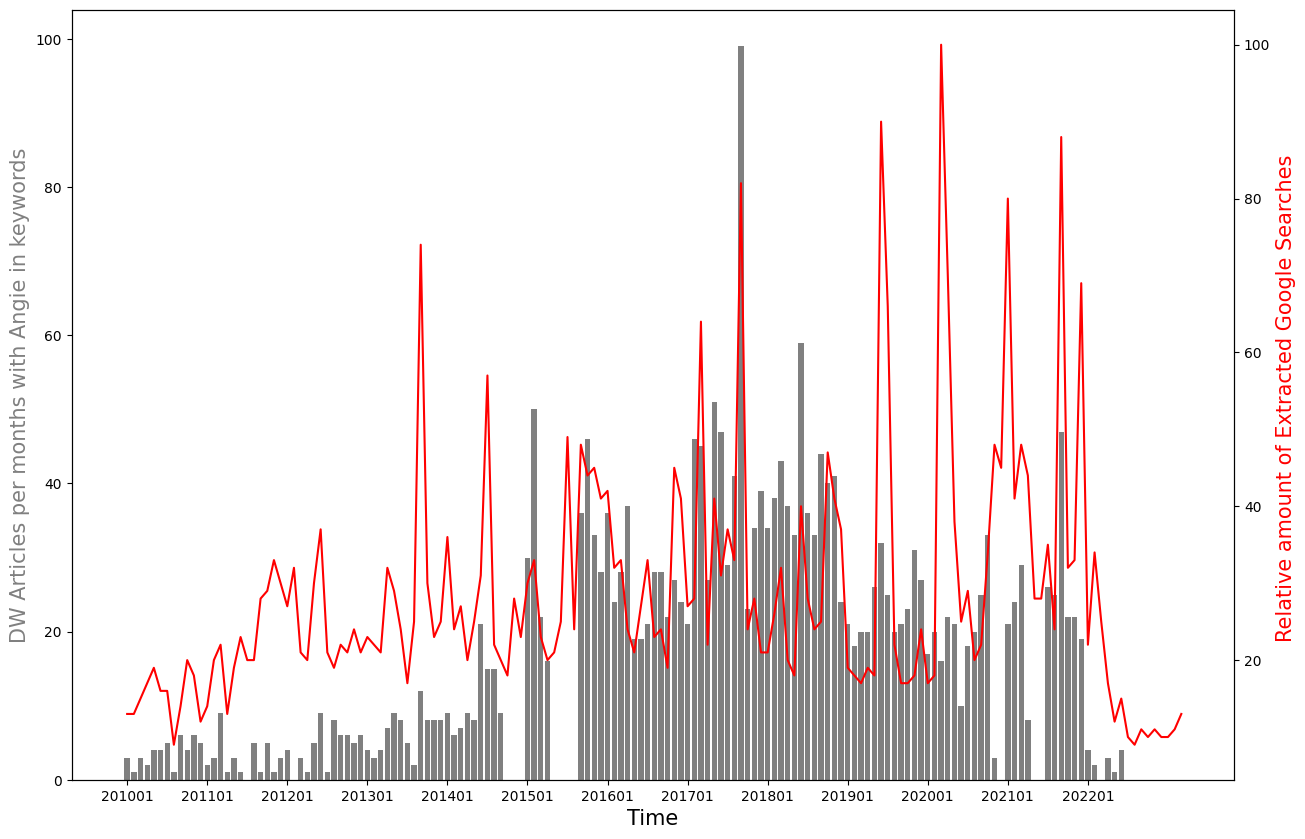

In [47]:
fig,ax = plt.subplots(figsize = (15,10))
ax.bar(df_yearmonth_counts['month_str'], df_yearmonth_counts.val, color = 'grey')
ax.set_xticks(df_yearmonth_counts['month_str'][::12], rotate = 60)
ax.set_xlabel('Time', fontsize = 15)
ax.set_ylabel('DW Articles per months with Angie in keywords', color = 'grey', fontsize = 15)
ax2 = ax.twinx()
ax2.plot(np.arange(0,len(angie_does_google.values)), angie_does_google.values, color = 'r')
ax2.set_ylabel('Relative amount of Extracted Google Searches ', color = 'r', fontsize = 15)
# save it
# output_dir = '/home/marios/S2DS/Spring23_DW/reports/figures'
# file_name = 'Angela_Merkel_and_DW_a_love_story.pdf'
# fig.savefig(op.join(output_dir,file_name))
plt.show()


In [53]:
size = df_yearmonth_counts.val.values.shape[0]
dw_raw = df_yearmonth_counts.val.values

In [54]:
google_raw = angie_does_google[:size]['Angela Merkel'].values

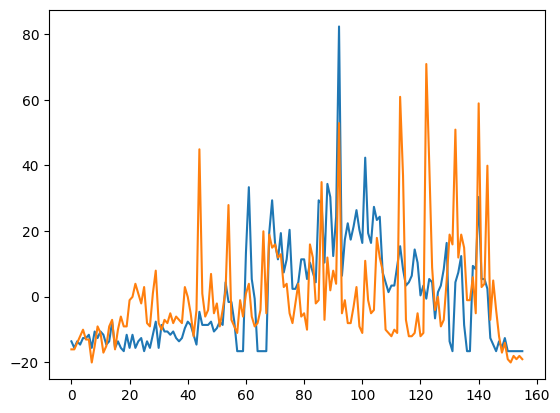

In [55]:
#let's subtract the meean from each signal 
dw = dw_raw-np.mean(dw_raw)
google = google_raw-np.mean(google_raw)

plt.plot(dw)
plt.plot(google)

In [61]:
df_yearmonth_counts


,val,month_str
201001,3,201001
201002,1,201002
201003,3,201003
201004,2,201004
201005,4,201005
...,...,...
202208,0,202208
202209,0,202209
202210,0,202210
202211,0,202211


create signle dataframe with time, dw word and google word

In [111]:
dw_df=pd.DataFrame({'yearmonth': df_yearmonth_counts['month_str'], 'dw_raw': dw_raw,'google_raw': google_raw})
#min_id=dw_df['dw_raw'].min()
dw_df #[dw_df['dw_raw']==0]
dw_df['dw_raw']=dw_df['dw_raw'].replace(0, 0.001)
dw_df['dw_raw'].min()

0.001

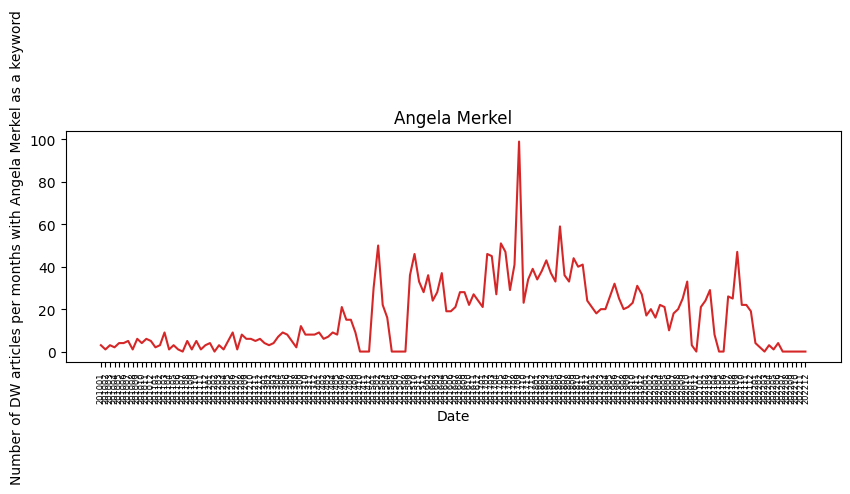

In [117]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Number of DW articles per months with Angela Merkel as a keyword', dpi=100):
    plt.figure(figsize=(10,3), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.xticks(fontsize=6, rotation=90)
    plt.show()

plot_df(dw_df, x=dw_df['yearmonth'], y=dw_df['dw_raw'], title='Angela Merkel')

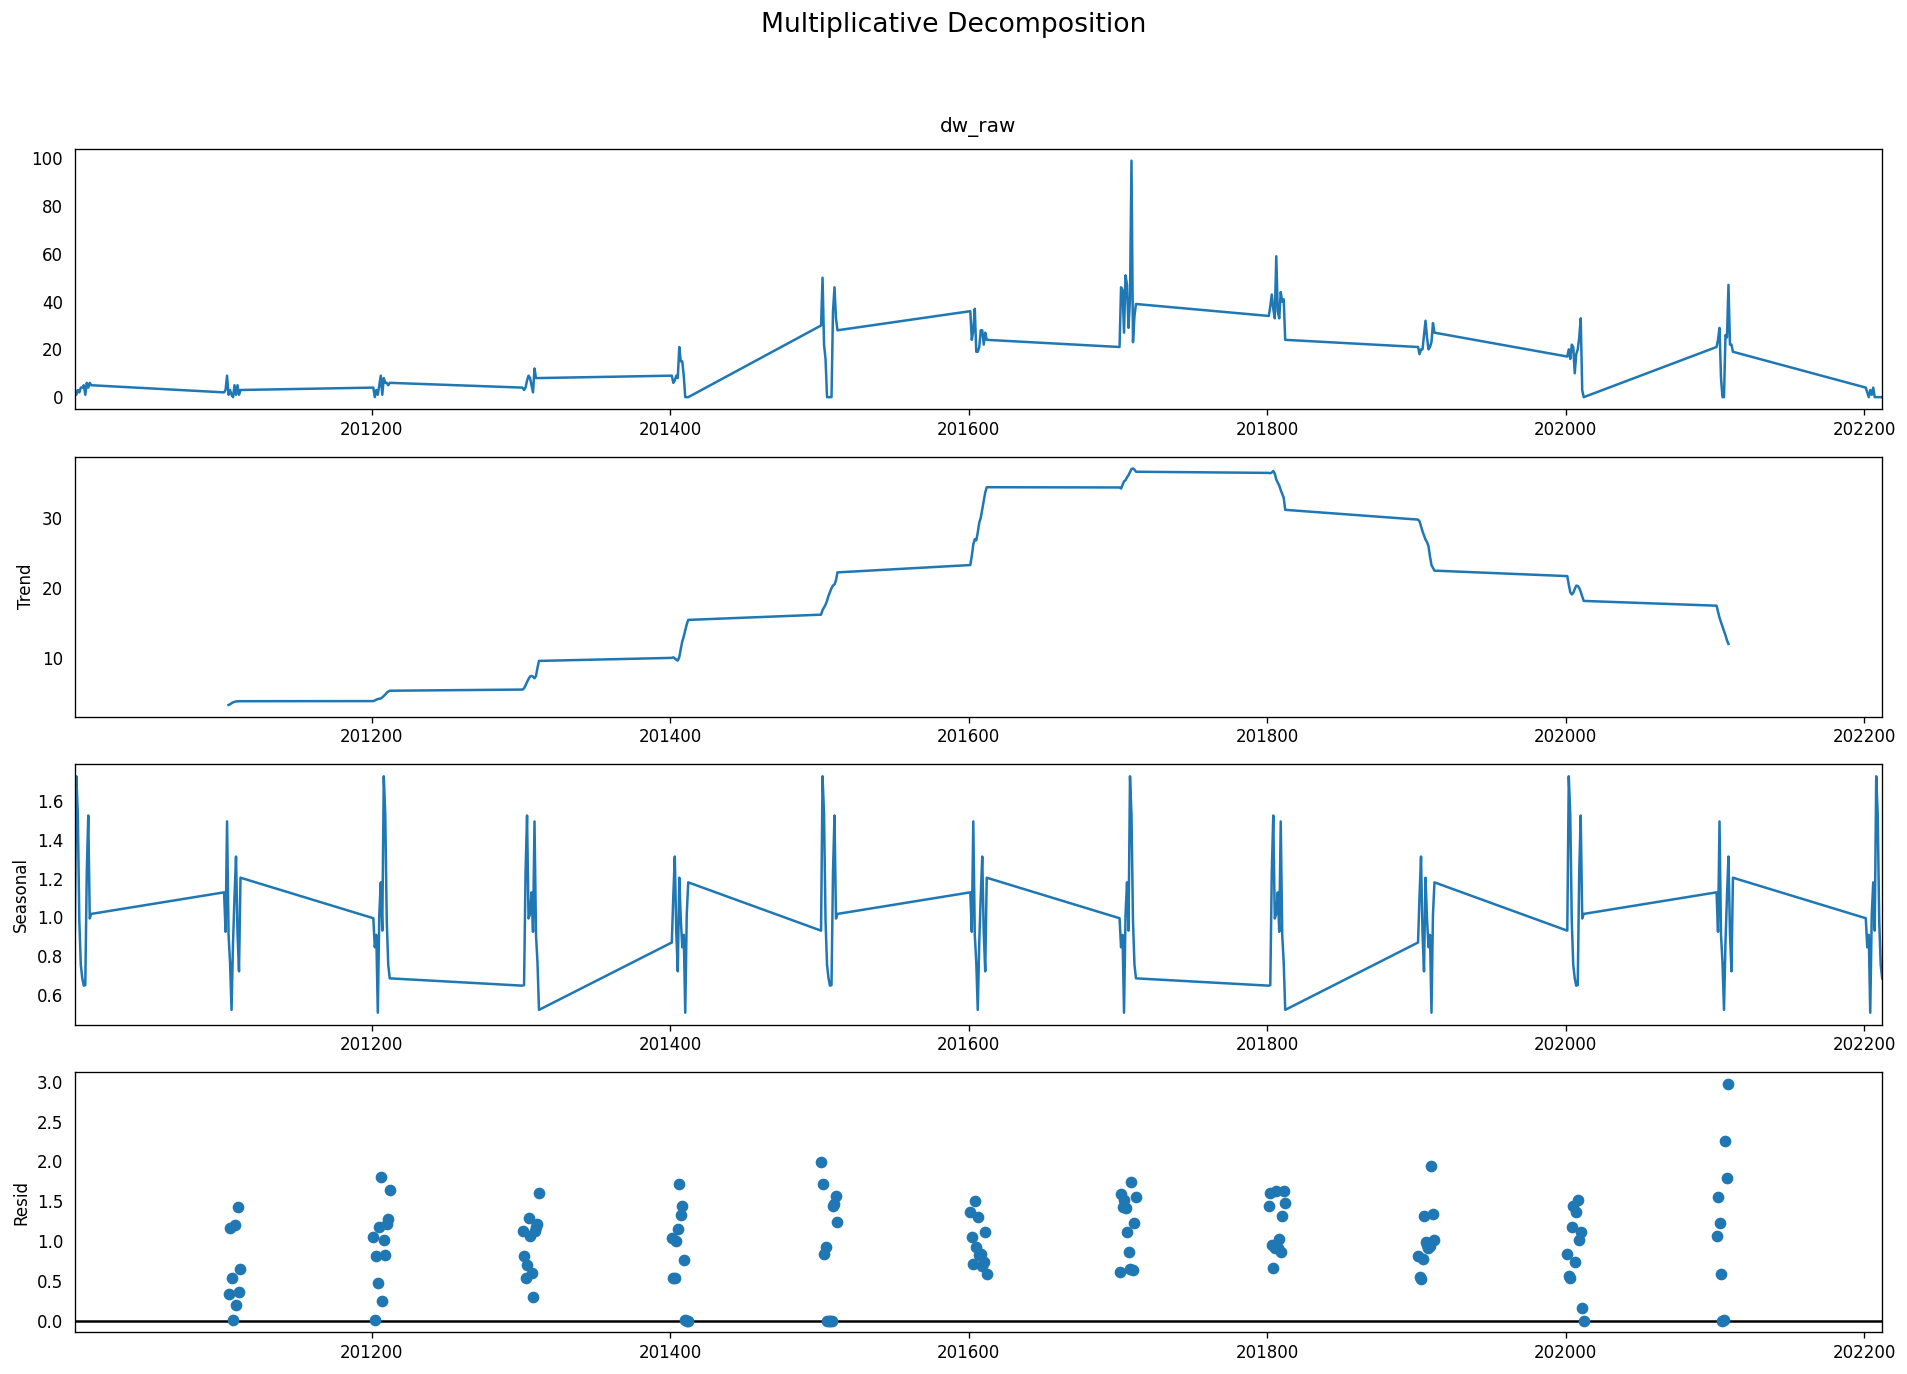

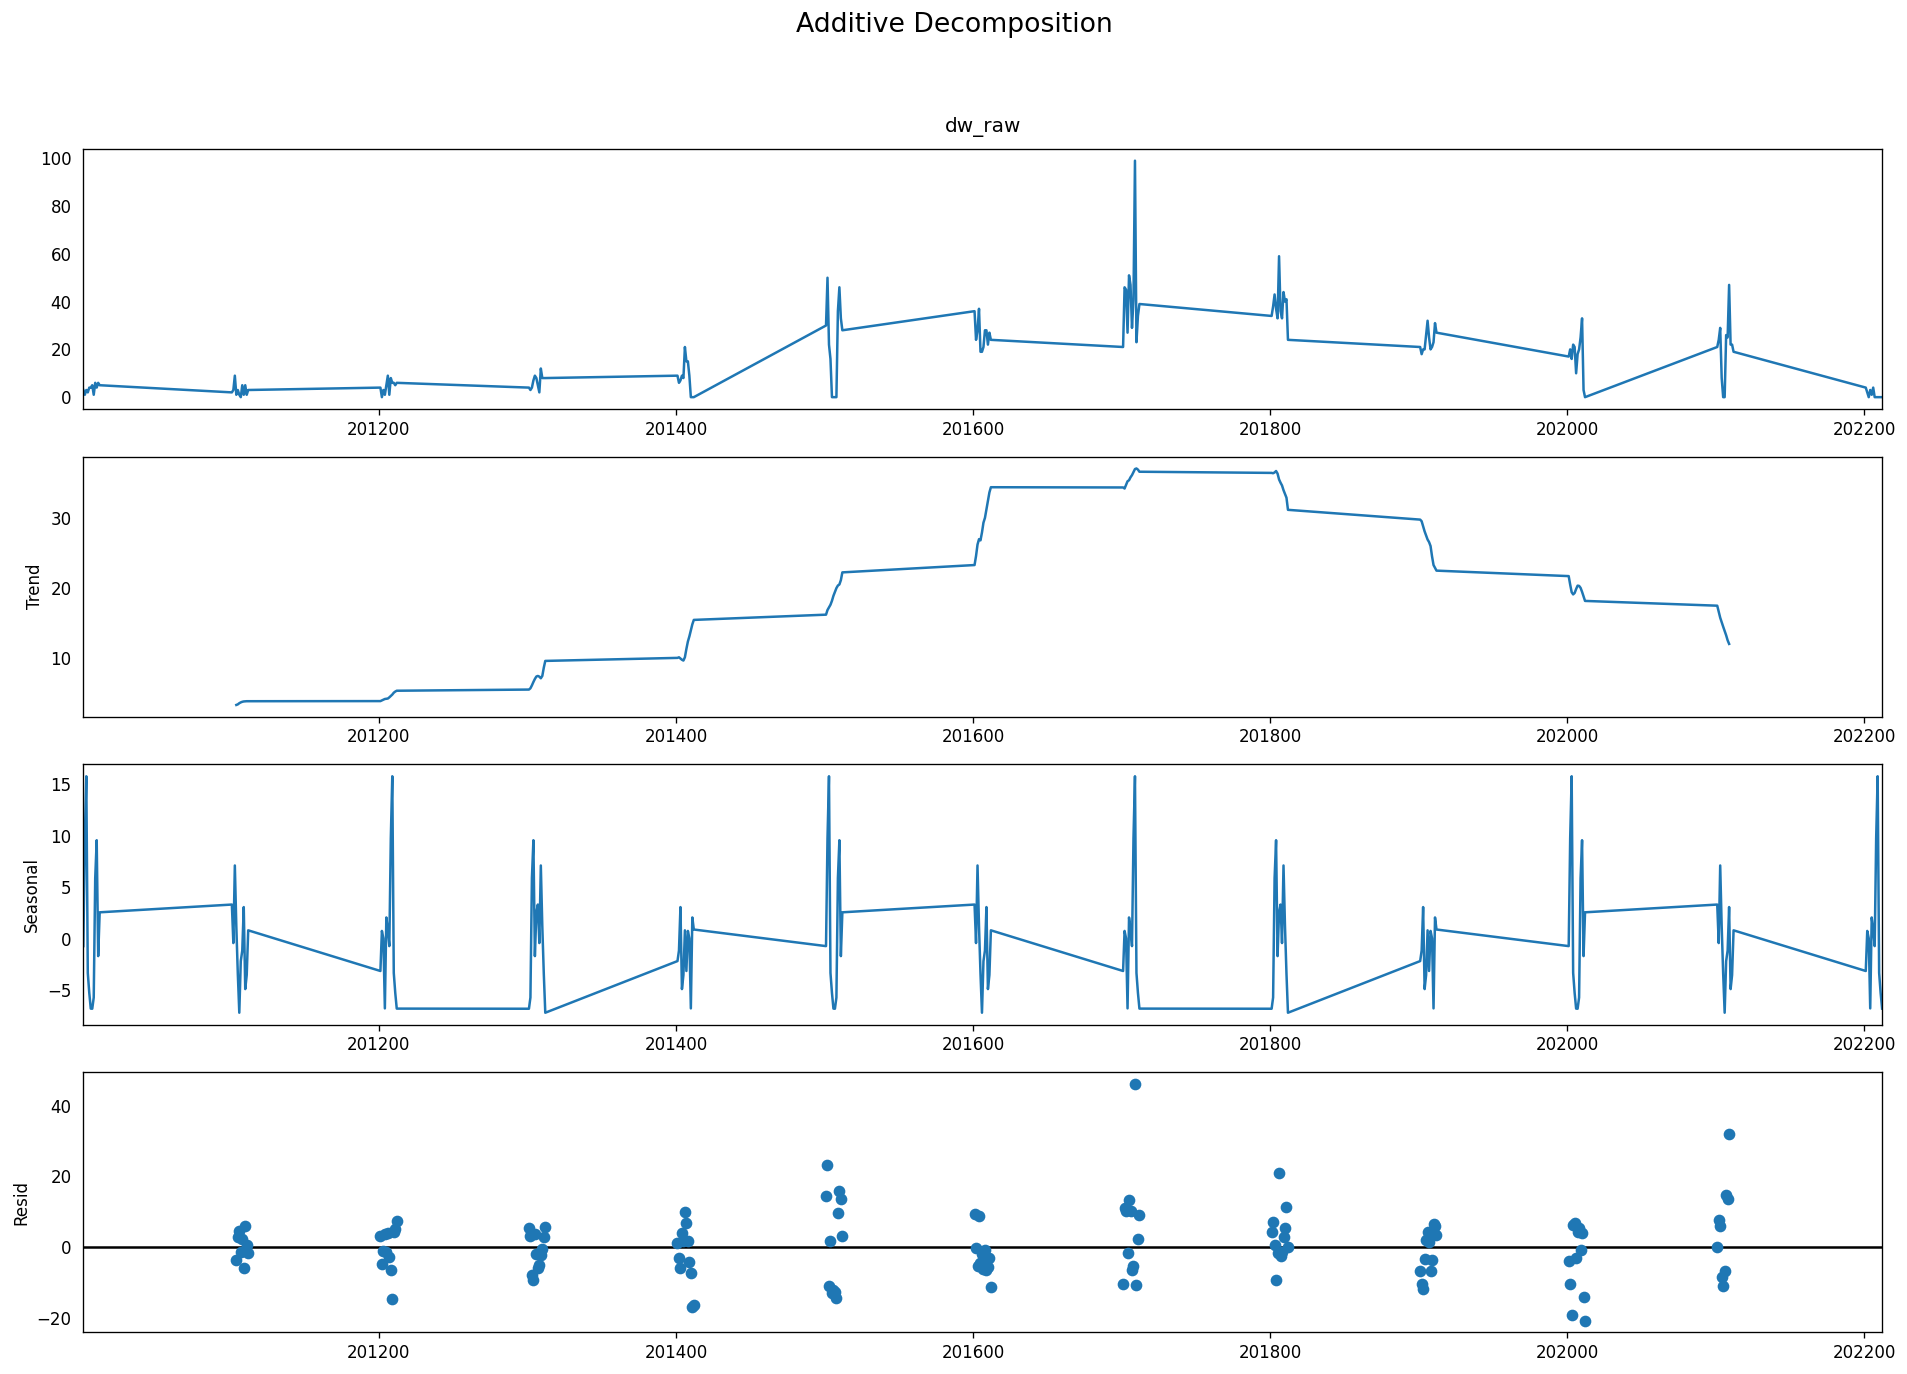

In [139]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse


# Multiplicative Decomposition 
multiplicative_decomposition = seasonal_decompose(dw_df['dw_raw'], model='multiplicative', period=30)

# Additive Decomposition
additive_decomposition = seasonal_decompose(dw_df['dw_raw'], model='additive', period=30)

# Plot
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

In [115]:
detrended

201001   NaN
201002   NaN
201003   NaN
201004   NaN
201005   NaN
          ..
202208   NaN
202209   NaN
202210   NaN
202211   NaN
202212   NaN
Name: trend, Length: 156, dtype: float64

Text(0.5, 1.0, 'Angela Merkel detrended by subtracting the least squares fit')

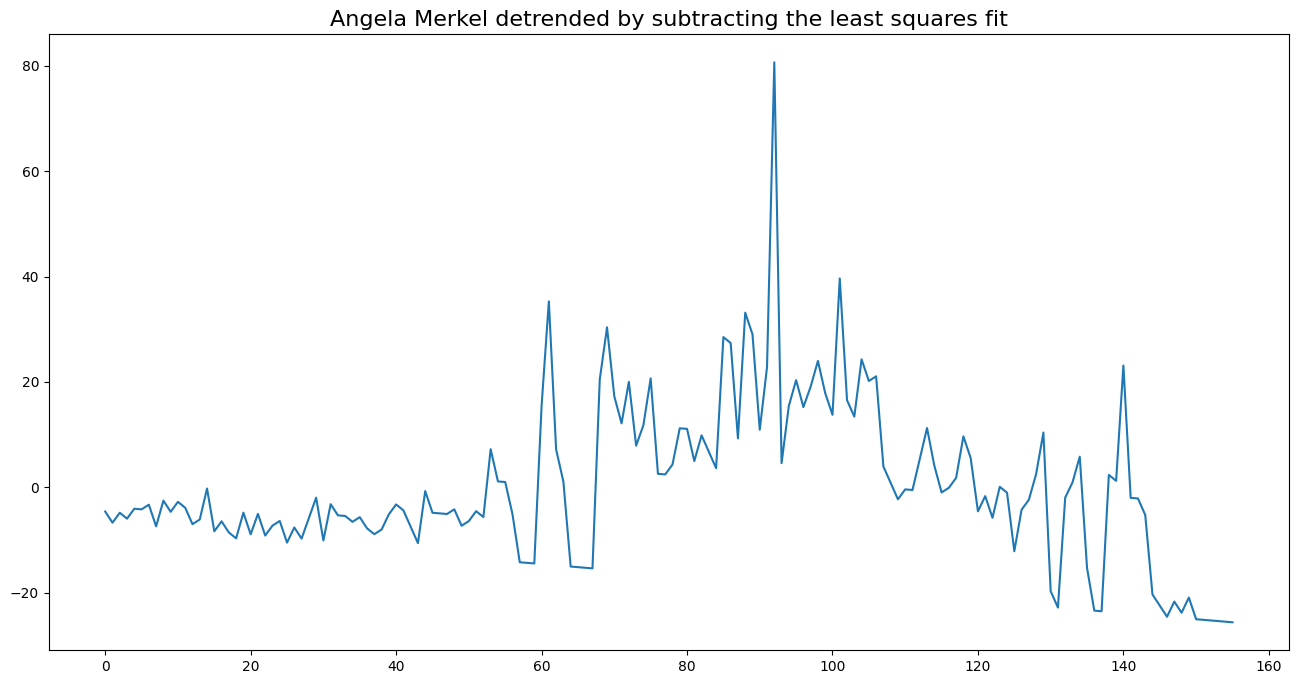

In [124]:
# Using scipy: Subtract the line of best fit
from scipy import signal
detrended = signal.detrend(dw_df['dw_raw'].values)
plt.plot(detrended)
plt.title('Angela Merkel detrended by subtracting the least squares fit', fontsize=16)

Text(0.5, 1.0, 'Angela Merkel detrended by subtracting the trend component')

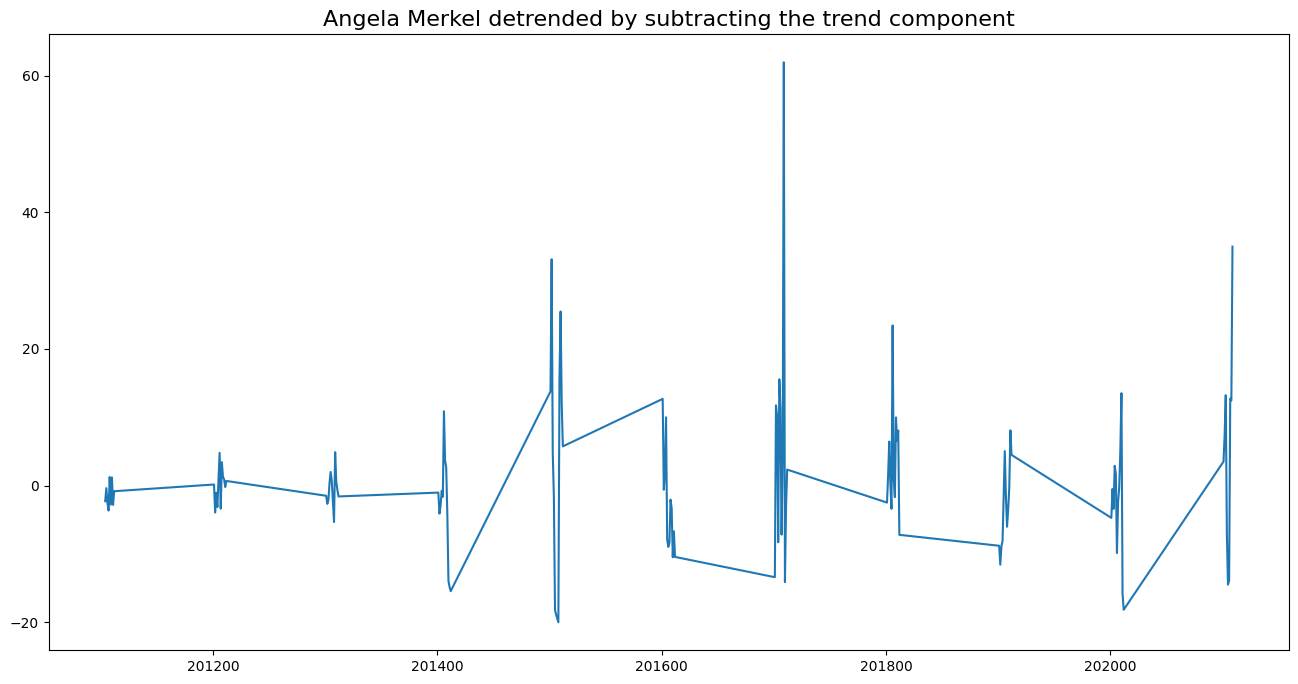

In [125]:
# Using statmodels: Subtracting the Trend Component
from statsmodels.tsa.seasonal import seasonal_decompose
result_mul = seasonal_decompose(dw_df['dw_raw'], model='multiplicative', period=30)
detrended = dw_df['dw_raw'].values - result_mul.trend
plt.plot(detrended)
plt.title('Angela Merkel detrended by subtracting the trend component', fontsize=16)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

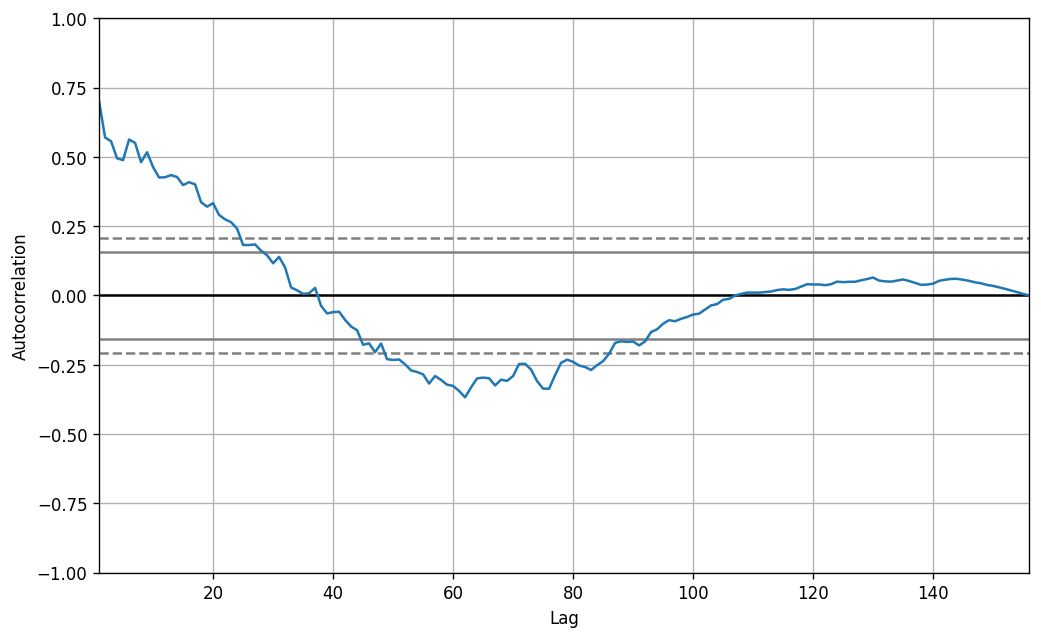

In [126]:
# Test for seasonality
from pandas.plotting import autocorrelation_plot

# Draw Plot
plt.rcParams.update({'figure.figsize':(10,6), 'figure.dpi':120})
autocorrelation_plot(dw_df['dw_raw'].tolist())

/home/anya_m/Documents/venv/lib64/python3.7/site-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


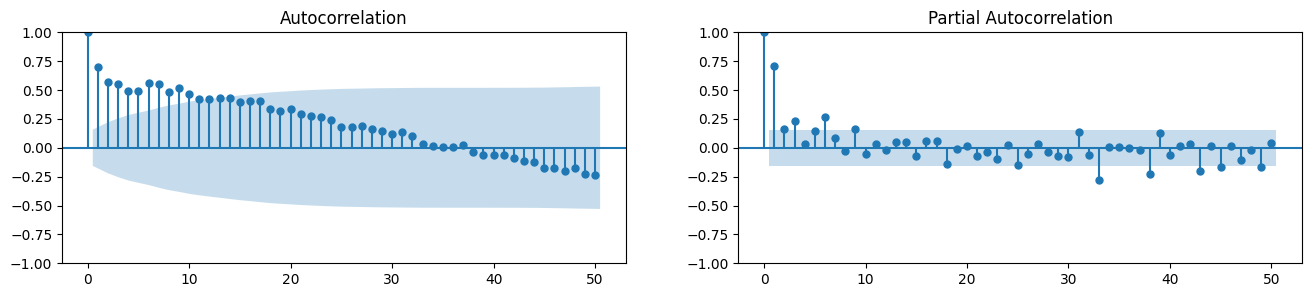

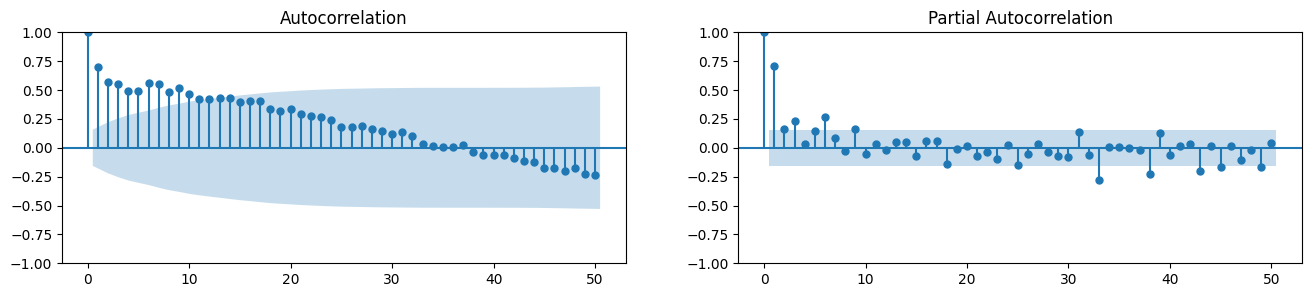

In [127]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(dw_df['dw_raw'].tolist(), lags=50, ax=axes[0])
plot_pacf(dw_df['dw_raw'].tolist(), lags=50, ax=axes[1])

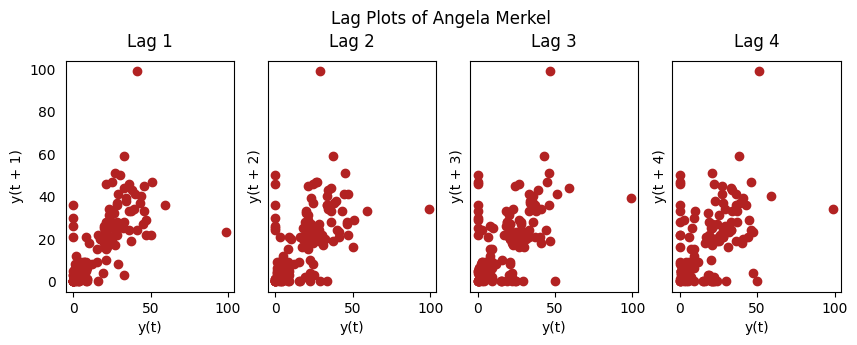

In [128]:
from pandas.plotting import lag_plot
plt.rcParams.update({'ytick.left' : False, 'axes.titlepad':10})

# Plot
fig, axes = plt.subplots(1, 4, figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(dw_df['dw_raw'], lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))

fig.suptitle('Lag Plots of Angela Merkel', y=1.05)    
plt.show()

## Granger test

In [136]:
from statsmodels.tsa.stattools import grangercausalitytests
#data = pd.read_csv('/kaggle/input/dataset/dataset.txt')
data['dw'] = dw_df['dw_raw']
data['google'] = dw_df['google_raw']
grangercausalitytests(data[['value', 'google']], maxlag=2)

TypeError: unhashable type: 'list'

In [135]:
data['dw', 'google']

KeyError: ('dw', 'google')